# Часть А

## Импорт библиотек

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
#pd.set_option('mode.chained_assignment', None)

## Загрузка данных

In [362]:
data = pd.read_csv("HistoryDataSet.csv", encoding = "cp1251", sep = ',')
data["ProductName"] = data["ProductName"].str.lower().str.title()
data

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
0,2217,17.0,Пополнение Виртуального Счёта,4500.0,STEAM,5816.0
1,635,17.0,Творог,40.0,Пятёрочка,5441.0
2,551,38.0,Вареники,259.0,Магнит,5441.0
3,2852,14.0,Шампунь,50.0,Магнит,5441.0
4,2365,8.0,Стрепсилс С Витамином С,163.0,apteka.ru,5912.0
...,...,...,...,...,...,...
700640,595,16.0,Апельсины,60.0,Пятёрочка,5441.0
700641,1463,33.0,Доширак,60.0,Магнит,5441.0
700642,1641,36.0,Мандарины,80.0,Пятёрочка,5441.0
700643,206,1.0,Пицца,350.0,Перекресток,5441.0


## Проверим данные на пропуски

In [363]:
data[data["ProductName"].isna()]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
179,"2971,14,""Гантель, игрушка для собак"",140,PetSh...",NaN,NaN,NaN,NaN,NaN
815,"2842,15,""Лакомство для собак крупных пород,"",1...",NaN,NaN,NaN,NaN,NaN
1580,"2970,16,""Енот, игрушка с пищалкой"",433,PetShop...",NaN,NaN,NaN,NaN,NaN
3464,"403,5,""Свечи накаливания, замена"",2500,GS auto...",NaN,NaN,NaN,NaN,NaN
3544,"2088,20,""Лакомство для собак крупных пород,"",1...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
699740,"1106,10,""Лакомство для собак крупных пород,"",1...",NaN,NaN,NaN,NaN,NaN
699951,"2078,7,""Флуоресцирующий грунт, зеленый"",770,Pe...",NaN,NaN,NaN,NaN,NaN
700057,"2109,6,""Поилка для грызунов, серая"",136,PetSho...",NaN,NaN,NaN,NaN,NaN
700105,"2022,3,""Енот, игрушка с пищалкой"",433,PetShop....",NaN,NaN,NaN,NaN,NaN


## Часть данных некорректно прогрузилась, необходимо это исправить

In [364]:
data_err = data[data["ProductName"].isna()]
for ind in range(data_err.shape[0]):
    curr_row = data_err.iloc[ind][0]
    #print(curr_row)
    temp_row = curr_row.split(',')
    #print(temp_row)
    prod_name = curr_row.split(',"')[1].split('"')
    #print(prod_name[0])
    data_err.UserId.iloc[ind] = int(temp_row[0])
    data_err.CheckId.iloc[ind] = int(temp_row[1])
    data_err.ProductName.iloc[ind] = str(prod_name[0])
    data_err.ProductCost.iloc[ind] = float(temp_row[-3])
    data_err.MerchantName.iloc[ind] = str(temp_row[-2])
    data_err.MCC.iloc[ind] = float(temp_row[-1])
    #print(data_err.iloc[ind])
data_err
data[data["ProductName"].isna()] = data_err
data.iloc[data_err.UserId]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
2971,2615,37.0,Лимон,40.0,Пятёрочка,5441.0
2842,1821,18.0,Конфеты,150.0,Перекресток,5441.0
2970,2871,18.0,Доширак,60.0,Магнит,5441.0
403,587,17.0,Ченок,60.0,Магнит,5441.0
2088,2386,20.0,Макароны,110.0,Пятёрочка,5441.0
...,...,...,...,...,...,...
1106,461,26.0,Помидоры,65.0,Магнит,5441.0
2078,2855,50.0,Глазированный Сырок,65.0,Пятёрочка,5441.0
2109,2692,32.0,Чипсы,99.0,Магнит,5441.0
2022,490,8.0,Макароны,80.0,Магнит,5441.0


In [365]:
data[data["ProductName"].isna()]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC


In [366]:
data.isna().value_counts()

UserId  CheckId  ProductName  ProductCost  MerchantName  MCC  
False   False    False        False        False         False    700645
dtype: int64

## Видно, что часть информации о купленных товарах утеряна: в названии товара Nan - это строка, поэтому на первом этапе поиска пропусков эти данные не были обнаружены. Восстановить такие строки невозможно, так как нет никакой информации о цене или названии товара. Используя данные о пользователе, магазине и MCC нет возможности восстановить и название и цену товара - необходимо, чтобы был хотя бы один из этих параметров

In [367]:
data[data["MCC"] == 5732]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
2438,1874,15.0,Смартфон Dexp,2999.0,DNS,5732.0
2520,2492,23.0,Ноутбук Acer Travelmate,12999.0,DNS,5732.0
4081,345,20.0,Детский Планшет Dexp,4999.0,DNS,5732.0
6043,2328,20.0,Планшет Samsung Galaxy Tab,14999.0,DNS,5732.0
6044,578,17.0,Nan,0.0,DNS,5732.0
...,...,...,...,...,...,...
695473,1792,35.0,Фитнес-Браслет Irbis,630.0,DNS,5732.0
695673,2516,24.0,Смартфон Itel,3699.0,DNS,5732.0
698271,345,19.0,Смарт-Часы Smarterra,899.0,DNS,5732.0
698974,1624,30.0,Nan,0.0,DNS,5732.0


In [368]:
data[data["ProductName"] == "Nan"]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
119,564,40.0,Nan,0.0,Перекресток,5441.0
173,1250,31.0,Nan,0.0,Перекресток,5441.0
381,2501,37.0,Nan,0.0,Перекресток,5441.0
444,2390,25.0,Nan,0.0,Перекресток,5441.0
526,2161,41.0,Nan,0.0,Пятёрочка,5441.0
...,...,...,...,...,...,...
699944,1655,22.0,Nan,0.0,apteka.ru,5912.0
700129,1059,1.0,Nan,0.0,Перекресток,5441.0
700318,654,19.0,Nan,0.0,Пятёрочка,5441.0
700402,148,17.0,Nan,0.0,GS auto,7538.0


## Как видно выше, ни в одном товаре, чье название утеряно нет информации о цене, это значит, что такие строки можно удалить из датасета

In [369]:
data[data["ProductName"] == "Nan"]["ProductCost"].value_counts()

0.0    5025
Name: ProductCost, dtype: int64

In [370]:
data[data["ProductName"] == "Nan"].index

Int64Index([   119,    173,    381,    444,    526,    738,    853,   1098,
              1204,   1487,
            ...
            699118, 699230, 699356, 699396, 699899, 699944, 700129, 700318,
            700402, 700578],
           dtype='int64', length=5025)

In [371]:
data.drop(data[data["ProductName"] == "Nan"].index, axis = 0, inplace = True)
data[data["ProductName"] == "Nan"]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC


## Теперь все данные загружены корректно и пропусков нет

In [395]:
data["UserId"] = data["UserId"].astype(np.int32)
data["CheckId"] = data["CheckId"].astype(np.int32)
data["ProductName"] = data["ProductName"].astype(str)
data["ProductCost"] = data["ProductCost"].astype(np.float32)
data["MerchantName"] = data["MerchantName"].astype(str)
data["MCC"] = data["MCC"].astype(np.int32)

## Изучим магазины, в которых люди приобретали продукты

In [396]:
data["MerchantName"].unique()

array(['STEAM', 'Пятёрочка', 'Магнит', 'apteka.ru', 'GS auto',
       'Перекресток', 'ikea.com', 'PetShop.ru', 'shein.com', 'Газпром',
       'OSAKA', 'MACDONALDS', 'Epic Games Store', 'DNS',
       'ActividionBlizzard', 'DODO'], dtype=object)

## Эти магазины можно разделить на несколько категорий:
## 1) Продукты: Пятёрочка, Магнит, Перекресток
## 2) Лекарства: apteka.ru
## 3) Рестораны: MACDONALDS, OSAKA, DODO
## 4) Одежда: shein.com
## 5) Компьютерные игры: ActividionBlizzard, STEAM, Epic Games Store
## 6) Товары для авто: Газпром, GS auto
## 7) Мебель: ikea.com
## 8) Товары для питомцев: PetShop.ru
## 9) Электроника: DNS

## Когда магазины были проанализированы вручную, было выделено 9 категорий товаров. Однако, если использовать для этого MCC - Merchant Category Code, то будет 10 категорий. Этот  код определяет тип продукции, которую реализует магазин. Выделим категории, используя информацию об этих кодах из интернета.
## Для перевода кодов в категории, будем использовать этот сайт: https://mcc-cod.ru/

In [397]:
data["MCC"].unique()

array([5816, 5441, 5912, 7538, 5712, 5995, 5691, 5541, 5814, 5732])

In [398]:
url_template = "https://mcc-cod.ru/rezultat-poiska-mcc-koda.html?search=''''&id=4473"

In [399]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:45.0) Gecko/20100101 Firefox/45.0'}
r = requests.get(url_template.replace("''''", "5816"), headers = headers)
r

<Response [200]>

In [400]:
def load_mcc_data(mcc, session):
    url = url_template.replace("''''", str(int(mcc)))
    request = session.get(url)
    return request.text

def table_data(text):
    soup = BeautifulSoup(text)
    table = soup.find('table', {'class': 'table table-striped'})
    return table

def category_extractor(table):
    txt_data = []
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        txt_data.append([ele for ele in cols if ele]) # Get rid of empty values
    return txt_data[0][1]

In [401]:
# establishing session
s = requests.Session() 
s.headers.update({
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; rv:45.0) Gecko/20100101 Firefox/45.0'
    })

mcc_codes = data["MCC"].unique()
mcc_dict = {}
for mcc in mcc_codes:
    table = table_data(load_mcc_data(str(int(mcc)), s))
    cat = category_extractor(table)
    mcc_dict[str(int(mcc))] = cat
    print(cat)

Цифровые товары – игры
Кондитерские
Аптеки, фармацевтические магазины
Магазины автосервиса
Оборудование, мебель и бытовые принадлежности (кроме электрооборудования)
Зоомагазины
Магазины мужской и женской одежды
Бензиновые станции обслуживания (с или без дополнительного сервиса)
Рестораны быстрого обслуживания
Магазины электро-товаров


In [402]:
mcc_dict

{'5816': 'Цифровые товары – игры',
 '5441': 'Кондитерские',
 '5912': 'Аптеки, фармацевтические магазины',
 '7538': 'Магазины автосервиса',
 '5712': 'Оборудование, мебель и бытовые принадлежности (кроме электрооборудования)',
 '5995': 'Зоомагазины',
 '5691': 'Магазины мужской и женской одежды',
 '5541': 'Бензиновые станции обслуживания (с или без дополнительного сервиса)',
 '5814': 'Рестораны быстрого обслуживания',
 '5732': 'Магазины электро-товаров'}

In [436]:
mcc_dict["5441"] = "Продуктовые магазины"

## Отличие категоризации по MCC в том, что разделяются магазины товаров для авто и заправочные станции. Остальные категории определены идентично, за исключением того, что продуктовые магазины: Пятёрочка, Магнит и Перекресток, определены как кондитерские

## Определим количество людей, которые совершали покупки

In [404]:
len(data["UserId"].unique())

3000

## Определим количество различных товаров, которые приобрели люди

In [405]:
len(data["ProductName"].unique())

264

## Теперь ясно, что покупки совершили 3000 человек, при этом они приобрели 264 различных товара. 

## Изучим частоту приобретения того или иного товара. 

In [406]:
temp = data["ProductName"].str.lower().value_counts()
temp.values

array([21938, 21766, 17733, 14857, 14696, 14686, 14578, 14571, 14554,
       14528, 14505, 14492, 14476, 14426, 14411, 14410, 14408, 14363,
       14362, 14327, 14323, 14268,  8887,  8875,  7401,  7392,  7370,
        7358,  7314,  7301,  7290,  7289,  7287,  7280,  7275,  7268,
        7263,  7262,  7255,  7250,  7244,  7242,  7216,  7216,  7211,
        7210,  7208,  7207,  7196,  7192,  7182,  7174,  7170,  7166,
        7141,  7129,  7128,  7119,  7119,  7101,  5181,  3304,  3304,
        2869,  2562,  2100,  1965,  1691,  1691,  1691,  1662,  1637,
        1108,  1008,   701,   701,   679,   661,   656,   636,   632,
         632,   625,   621,   613,   612,   612,   609,   609,   603,
         596,   593,   592,   585,   583,   581,   581,   580,   577,
         570,   563,   562,   557,   557,   550,   548,   528,   522,
         496,   483,   444,   435,   368,   358,   343,   343,   343,
         343,   334,   332,   332,   332,   329,   328,   324,   322,
         322,   321,

## Предположим, что есть 4 группы товаров:
## 1) Товары, которые купили менее 100 раз
## 2) Товары, которые купили не менее 100 раз, но не более 1000 раз
## 3) Товары, которые купили не менее 1000 раз, но не более 10000 раз
## 4) Товары, которые купили более 10000 раз

## Для построения гистограмм в одном масштабе, необходимо определить размах цен в каждой категории.

In [407]:
borders = [100, 1000, 10000]
maxs = np.zeros(4)
mins = np.zeros(4)
group_price_products_1 = set()
group_price_products_2 = set()
group_price_products_3 = set()
group_price_products_4 = set()

for name in data["ProductName"].unique():
    plot_data = data[data["ProductName"] == name]["ProductCost"]
    temp_data = data[data["ProductName"] == name]
    #print(temp_data)
    for i in range(len(temp_data)):
        if(temp_data.iloc[i, 3] <= 1000):
            group_price_products_1.add(temp_data.iloc[i, 2])
        elif(temp_data.iloc[i, 3] > 1000 and temp_data.iloc[i, 3] <= 2000):
            group_price_products_2.add(temp_data.iloc[i, 2])
        elif(temp_data.iloc[i, 3] > 2000 and temp_data.iloc[i, 3] <= 10000):
            group_price_products_3.add(temp_data.iloc[i, 2])
        else:
            group_price_products_4.add(temp_data.iloc[i, 2])
    
    if(len(plot_data) < borders[0]):
        if mins[0] == 0: mins[0] = plot_data.iloc[0]
        maxs[0] = max(maxs[0], plot_data.max())
        mins[0] = min(mins[0], plot_data.min())
    elif(len(plot_data) >= borders[0] and len(plot_data) < borders[1]):
        if mins[1] == 0: mins[1] = plot_data.iloc[0]
        maxs[1] = max(maxs[1], plot_data.max())
        mins[1] = min(mins[1], plot_data.min())
    elif(len(plot_data) >= borders[1] and len(plot_data) < borders[2]):
        if mins[2] == 0: mins[2] = plot_data.iloc[0]
        maxs[2] = max(maxs[2], plot_data.max())
        mins[2] = min(mins[2], plot_data.min())
    else:
        if mins[3] == 0: mins[3] = plot_data.iloc[0]
        maxs[3] = max(maxs[3], plot_data.max())
        mins[3] = min(mins[3], plot_data.min())
maxs, mins

(array([60000., 20000.,  7990.,   590.]), array([85., 26., 20., 30.]))

In [408]:
group_price_products_1, group_price_products_2, group_price_products_3, group_price_products_4

({'The Lust Of Us 2',
  'Авокадо',
  'Автопоилка Для Грызуна',
  'Апельсины',
  'Бальзам Золотая Звезда',
  'Банан',
  'Бараний Рубец',
  'Батарейки',
  'Батончики',
  'Блуза В Клетку',
  'Блуза С Леопардовым Принтом',
  'Блуза С Рукавами-Фонариками',
  'Бритва',
  'Вареники',
  'Верёвка',
  'Вино',
  'Влажный Корм Для Взрослых Кошек',
  'Влажный Корм Для Стерилизованных Котов И Кошек',
  'Галвус Мет',
  'Гамак Для Хорька',
  'Гантель, игрушка для собак',
  'Глазированный Сырок',
  'Глюконорм',
  'Глюкофаж Лонг',
  'Гранулированный Корм Для Крыс И Мышей',
  'Гречка',
  'Грибы Грузди Солёные',
  'Грунт с флуоресцирующими гранулами, черный',
  'Две Миски На Подставке',
  'Дентал-Кость С Ароматом Ванили',
  'Держатель Для Поилки Для Кроликов ',
  'Джинсы С Карманом С Контрастной Отделкой',
  'Диагностика Электронной Системы Управления Двигателем',
  'Диск Для Фрисби',
  'Домик Для Грызунов',
  'Домик-Хижина Для Хомяков',
  'Доширак',
  'Енот, игрушка с пищалкой',
  'Заказ',
  'Замена Датч

## После определения ценового размаха, можно построить гистограммы продуктов находящихся в одной категории на одном графике

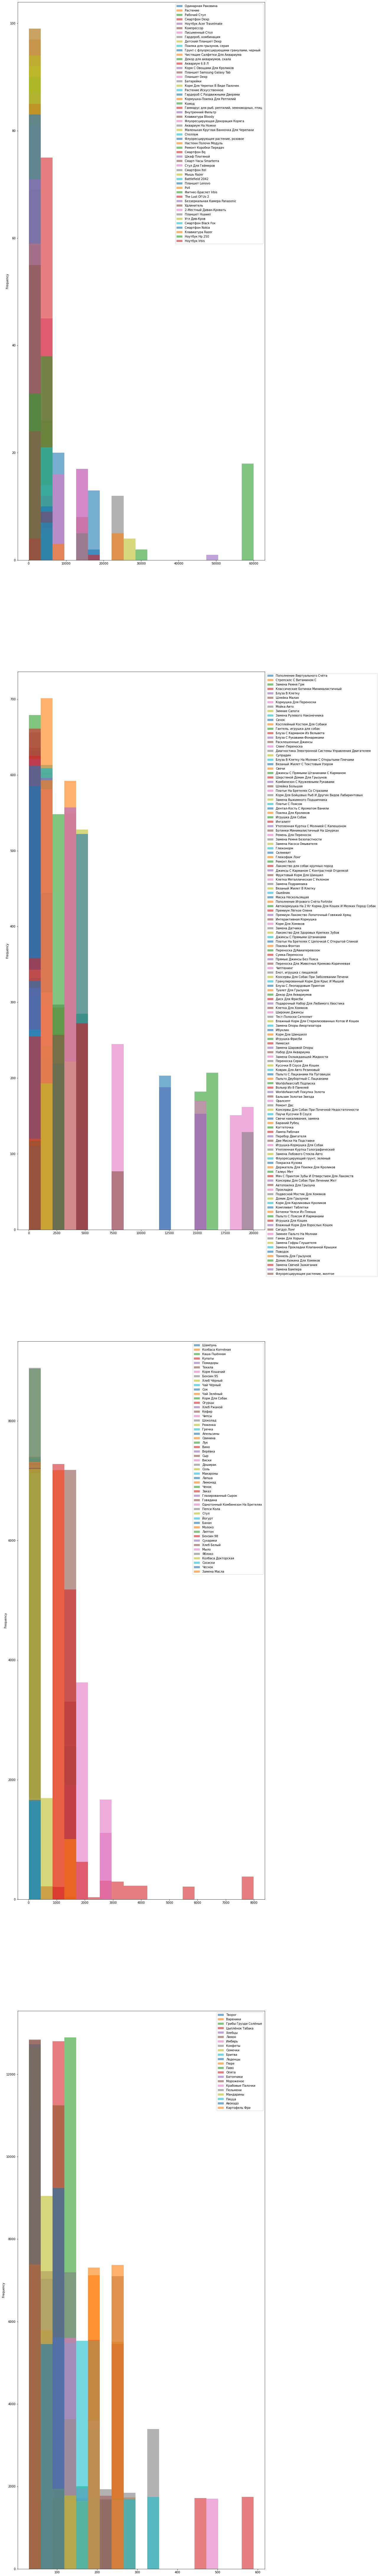

In [439]:
fig, axes = plt.subplots(figsize = (15, 160), nrows=4, ncols=1)
group_lens = np.zeros(4)
group_quantity_products_1 = []
group_quantity_products_2 = []
group_quantity_products_3 = []
group_quantity_products_4 = []

most_often_products = set()

bins = []
for i in range(len(maxs)):
    bins.append(np.linspace(mins[i], maxs[i], 20))
for name in data["ProductName"].unique():
    #print(name)
    #print(data[data["ProductName"] == name]["ProductCost"].values)
    plot_data = data[data["ProductName"] == name]["ProductCost"]
    if(len(plot_data) >= 1500):
        most_often_products.add(name)
    if(len(plot_data) < borders[0]):
        plot_data.plot.hist(ax=axes[0], bins = bins[0], alpha=0.6, label = name)
        group_lens[0] += len(plot_data)
        group_quantity_products_1.append(name)
    elif(len(plot_data) >= borders[0] and len(plot_data) < borders[1]):
        plot_data.plot.hist(ax=axes[1], bins = bins[1], alpha=0.6, label = name)
        group_lens[1] += len(plot_data)
        group_quantity_products_2.append(name)
    elif(len(plot_data) >= borders[1] and len(plot_data) < borders[2]):
        plot_data.plot.hist(ax=axes[2], bins = bins[2], alpha=0.6, label = name)
        group_lens[2] += len(plot_data)
        group_quantity_products_3.append(name)
    else:
        plot_data.plot.hist(ax=axes[3], bins = bins[3], alpha=0.6, label = name)
        group_lens[3] += len(plot_data)
        group_quantity_products_4.append(name)
    #if()
for ax in axes:
    ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [410]:
group_lens

array([  2153.,  46828., 309961., 336678.])

In [411]:
group_products_1, group_products_2, group_products_3, group_products_4

(['Одинарная Раковина',
  'Растение',
  'Рабочий Стул',
  'Смартфон Dexp',
  'Ноутбук Acer Travelmate',
  'Компрессор',
  'Письменный Стол',
  'Детский Планшет Dexp',
  'Чистящие Салфетки Для Аквариума',
  'Аквариум 6.8 Л',
  'Корм С Овощами Для Кроликов',
  'Планшет Samsung Galaxy Tab',
  'Планшет Dexp',
  'Батарейки',
  'Корм Для Черепах В Виде Палочек',
  'Растение Искусственное',
  'Гардероб С Раздвижными Дверями',
  'Кормушка-Поилка Для Рептилий',
  'Комод',
  'Внутренний Фильтр',
  'Клавиатура Bloody',
  'Флуоресцирующая Декорация Коряга',
  'Аквариум На Ножке',
  'Маленькая Круглая Ванночка Для Черепахи',
  'Стеллаж',
  'Настенн Полочн Модуль',
  'Ремонт Коробки Передач',
  'Смартфон Bq',
  'Шкаф Платяной',
  'Смарт-Часы Smarterra',
  'Стул Для Геймеров',
  'Смартфон Itel',
  'Мышь Razer',
  'Battlefield 2042',
  'Планшет Lenovo',
  'Ps4',
  'Фитнес-Браслет Irbis',
  'The Lust Of Us 2',
  'Беззеркальная Камера Panasonic',
  'Удлинитель',
  '2-Местный Диван-Кровать',
  'Планшет H

In [412]:
## После построения гистограмм, можно сделать логичный вывод: Чем дороже товар, тем реже его покупают. Однако, кроме этого, можно сказать, что люди покупают товары стоимостью до 1500 рублей чаще всего и как правило это необходимые продукты питания. Товары дороже 1500 рублей, но дешевле 10000 рублей - это товары для обслуживания автомобилей: бензин, масло, а также алкоголь. Товары дороже 10000 - как правило одежда, товары для хобби, животных, серьезный ремонт автомобиля, лекарства, мебель, электроника

## Проанализируем полученные результаты:
## Наиболее популярными товарами (то есть товары, которые купили не менее 1500 раз) стали продукты питания, товары для гигиены, корма для питомцев, а также бензин (95 и 98) и стул из пятерочки, который купили 1691 раз по цене 500 рублей - это единственный предмет мебели, который вошел в эту категорию. Кроме того люди часто заказывали еду из ресторанов: 'OSAKA', 'MACDONALDS' и 'DODO'.

In [413]:
most_often_products

{'Авокадо',
 'Апельсины',
 'Банан',
 'Батончики',
 'Бензин 95',
 'Бензин 98',
 'Бритва',
 'Вареники',
 'Верёвка',
 'Вино',
 'Виски',
 'Глазированный Сырок',
 'Говядина',
 'Гречка',
 'Грибы Грузди Солёные',
 'Доширак',
 'Заказ',
 'Имбирь',
 'Йогурт',
 'Картофель Фри',
 'Каша Пшённая',
 'Кефир',
 'Колбаса Докторская',
 'Колбаса Копчёная',
 'Конфеты',
 'Корм Для Собак',
 'Корм Кошачий',
 'Крабовые Палочки',
 'Купаты',
 'Лапша',
 'Леденцы',
 'Лимон',
 'Лимонад',
 'Липтон',
 'Лук',
 'Макароны',
 'Мандарины',
 'Молоко',
 'Мороженое',
 'Мыло',
 'Огурцы',
 'Опята',
 'Пельмени',
 'Пепси Кола',
 'Пиво',
 'Пицца',
 'Помидоры',
 'Пюре',
 'Ряженка',
 'Свинина',
 'Семечки',
 'Сок',
 'Соль',
 'Сосиски',
 'Стул',
 'Сухарики',
 'Сыр',
 'Творог',
 'Текила',
 'Хлеб Белый',
 'Хлеб Ржаной',
 'Хлеб Чёрный',
 'Хлебцы',
 'Цыплёнок Табака',
 'Чай Зелёный',
 'Чай Чёрный',
 'Ченок',
 'Чеснок',
 'Чипсы',
 'Шампунь',
 'Шоколад',
 'Яблоко'}

In [414]:
data[data["ProductName"] == "Заказ"]["MerchantName"].unique()

array(['OSAKA', 'MACDONALDS', 'DODO'], dtype=object)

In [415]:
data[data["ProductName"] == "Стул"]

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
189,979,30,Стул,500.0,Пятёрочка,5441
557,2818,28,Стул,500.0,Пятёрочка,5441
835,8,36,Стул,500.0,Пятёрочка,5441
1037,1992,4,Стул,500.0,Пятёрочка,5441
1173,611,23,Стул,500.0,Пятёрочка,5441
...,...,...,...,...,...,...
700043,2768,36,Стул,500.0,Пятёрочка,5441
700050,1143,23,Стул,500.0,Пятёрочка,5441
700191,1071,30,Стул,500.0,Пятёрочка,5441
700256,677,32,Стул,500.0,Пятёрочка,5441


In [416]:
data[data["ProductName"] == "Стул"]["ProductCost"].unique()

array([500.], dtype=float32)

In [417]:
data[data["ProductName"] == "Стул"]["MerchantName"].unique()

array(['Пятёрочка'], dtype=object)

## Рассмотрим наиболее популярные товары в категории до 1000 рублей

In [475]:
group_price_products_1

{'The Lust Of Us 2',
 'Авокадо',
 'Автопоилка Для Грызуна',
 'Апельсины',
 'Бальзам Золотая Звезда',
 'Банан',
 'Бараний Рубец',
 'Батарейки',
 'Батончики',
 'Блуза В Клетку',
 'Блуза С Леопардовым Принтом',
 'Блуза С Рукавами-Фонариками',
 'Бритва',
 'Вареники',
 'Верёвка',
 'Вино',
 'Влажный Корм Для Взрослых Кошек',
 'Влажный Корм Для Стерилизованных Котов И Кошек',
 'Галвус Мет',
 'Гамак Для Хорька',
 'Гантель, игрушка для собак',
 'Глазированный Сырок',
 'Глюконорм',
 'Глюкофаж Лонг',
 'Гранулированный Корм Для Крыс И Мышей',
 'Гречка',
 'Грибы Грузди Солёные',
 'Грунт с флуоресцирующими гранулами, черный',
 'Две Миски На Подставке',
 'Дентал-Кость С Ароматом Ванили',
 'Держатель Для Поилки Для Кроликов ',
 'Джинсы С Карманом С Контрастной Отделкой',
 'Диагностика Электронной Системы Управления Двигателем',
 'Диск Для Фрисби',
 'Домик Для Грызунов',
 'Домик-Хижина Для Хомяков',
 'Доширак',
 'Енот, игрушка с пищалкой',
 'Заказ',
 'Замена Датчика',
 'Замена Насоса Омывателя',
 'Заме

## В этой ценовой категории можно найти товары из всех категорий магазинов

## Определим наиболее популярную и не популярную категории магазинов

In [437]:
for cat in mcc_dict:
    print("Название категории: ", mcc_dict[cat], "; Число купленных товаров из этой категории: ", data[data["MCC"] == int(cat)].shape[0])

Название категории:  Цифровые товары – игры ; Число купленных товаров из этой категории:  2088
Название категории:  Продуктовые магазины ; Число купленных товаров из этой категории:  629846
Название категории:  Аптеки, фармацевтические магазины ; Число купленных товаров из этой категории:  4655
Название категории:  Магазины автосервиса ; Число купленных товаров из этой категории:  7285
Название категории:  Оборудование, мебель и бытовые принадлежности (кроме электрооборудования) ; Число купленных товаров из этой категории:  528
Название категории:  Зоомагазины ; Число купленных товаров из этой категории:  23302
Название категории:  Магазины мужской и женской одежды ; Число купленных товаров из этой категории:  16982
Название категории:  Бензиновые станции обслуживания (с или без дополнительного сервиса) ; Число купленных товаров из этой категории:  7743
Название категории:  Рестораны быстрого обслуживания ; Число купленных товаров из этой категории:  2869
Название категории:  Магазины 

## Вполне ожидаемо наиболее популярными стали магазины продуктов питания, а наименее популярные - магазины электроники, что объясняется тем, что товары в магазинах этой категории дорогие и покупаются не так часто

## Изучим распределения цен и частот 

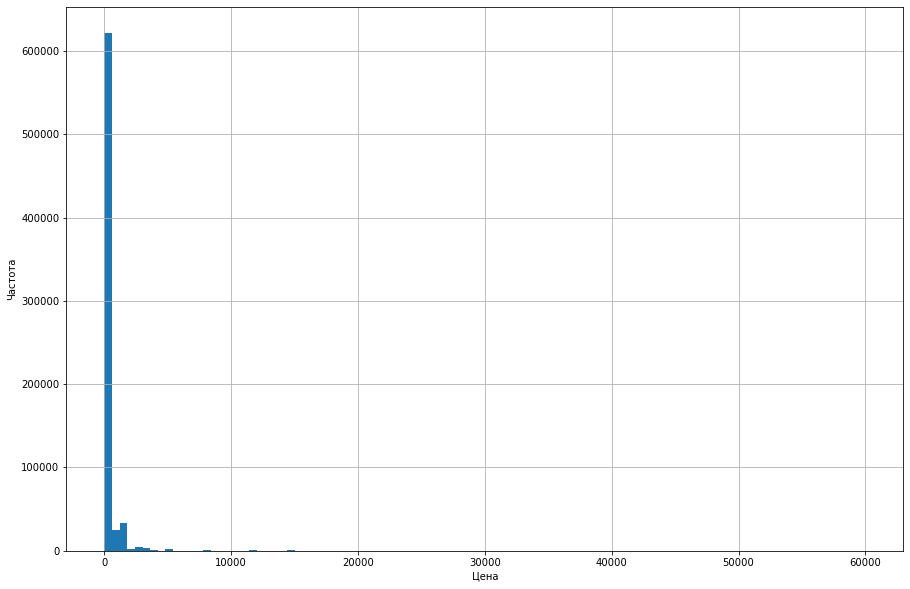

In [458]:
plt.figure(figsize = (15, 10))
data["ProductCost"].hist(bins = 100)
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

## Изучим распределения категорий и частот 

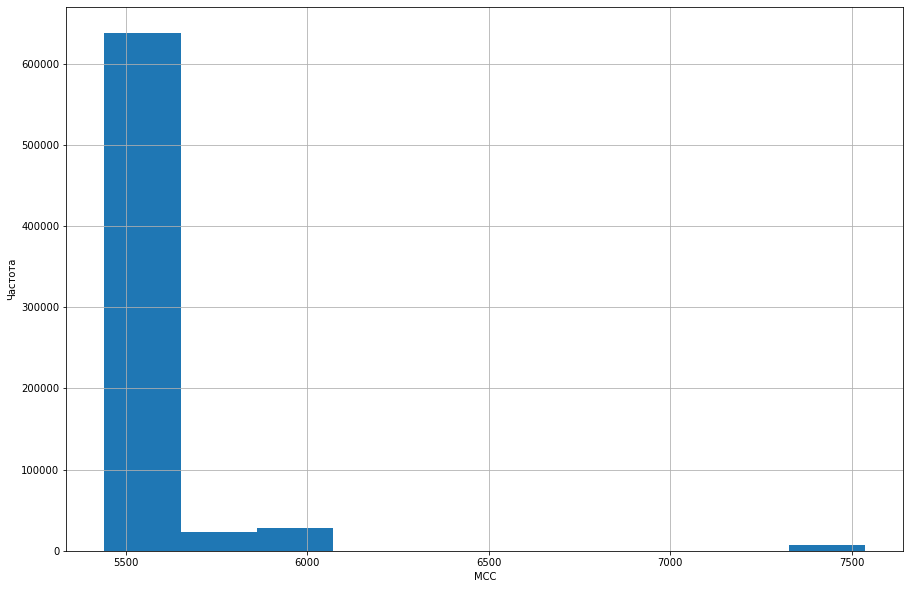

In [474]:
plt.figure(figsize = (15, 10))
data["MCC"].hist(bins = 10)
plt.xlabel("MCC")
plt.ylabel("Частота")
plt.show()

## Оба распределения выше не нормальны

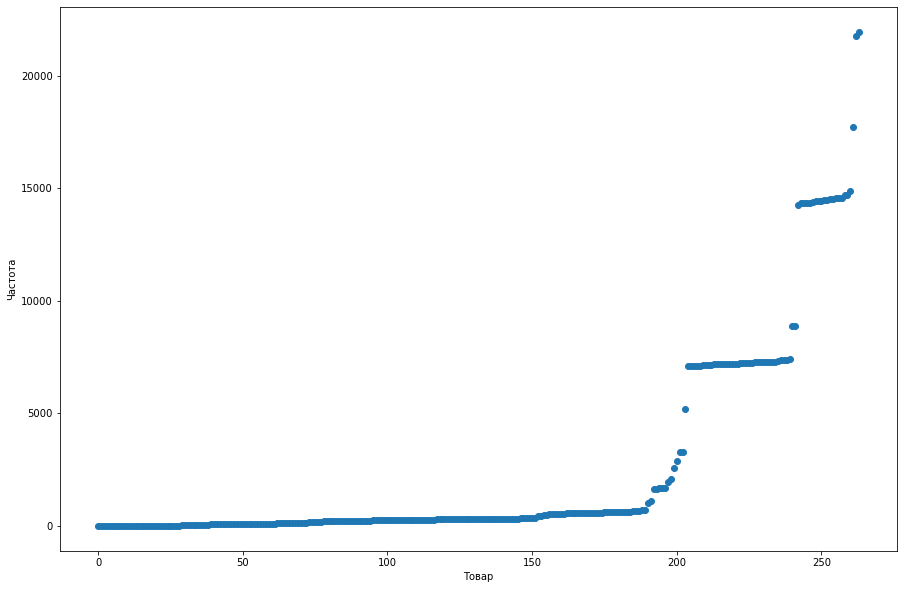

In [471]:
plt.figure(figsize = (15, 10))
plt.plot(sorted(data["ProductName"].value_counts().values), 'o')
plt.xlabel("Товар")
plt.ylabel("Частота")
plt.grid(False)
plt.show()

## По предыдущему графику видно, что по частоте приобритения есть три крупных группы товаров

## Рассмотрим распределения средней стоимости чека каждого клиента, в каждой категории товаров

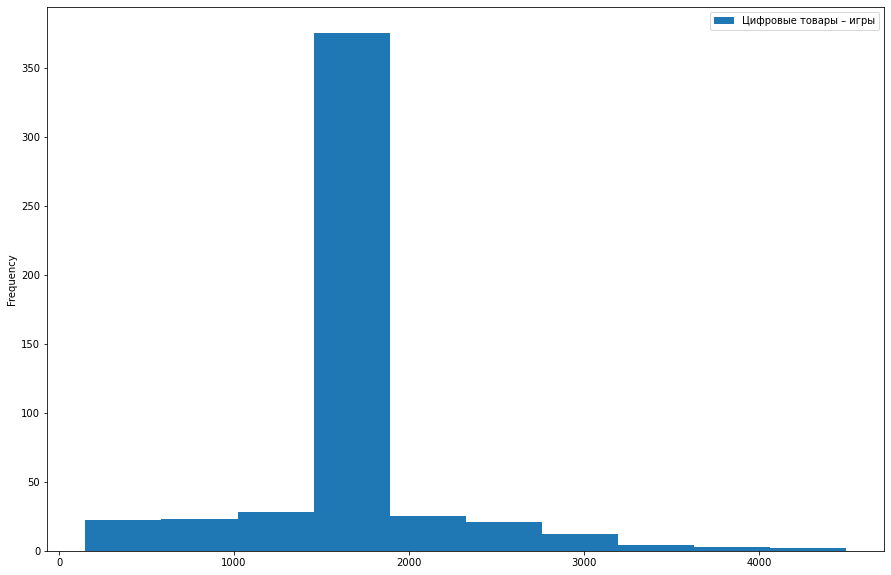

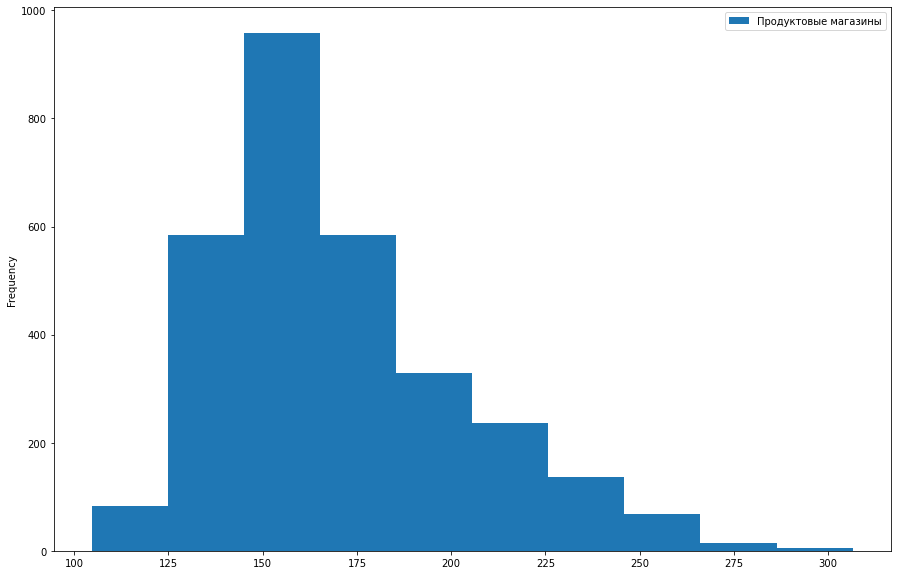

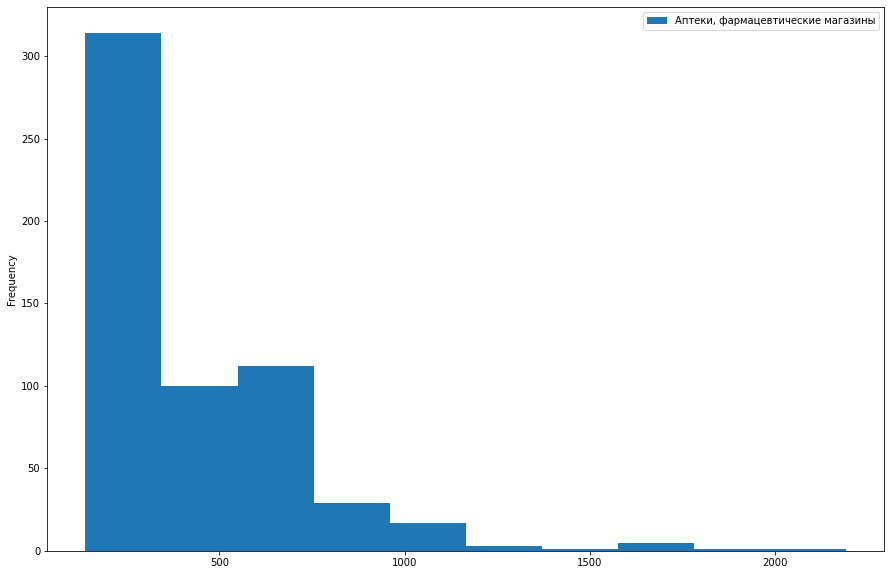

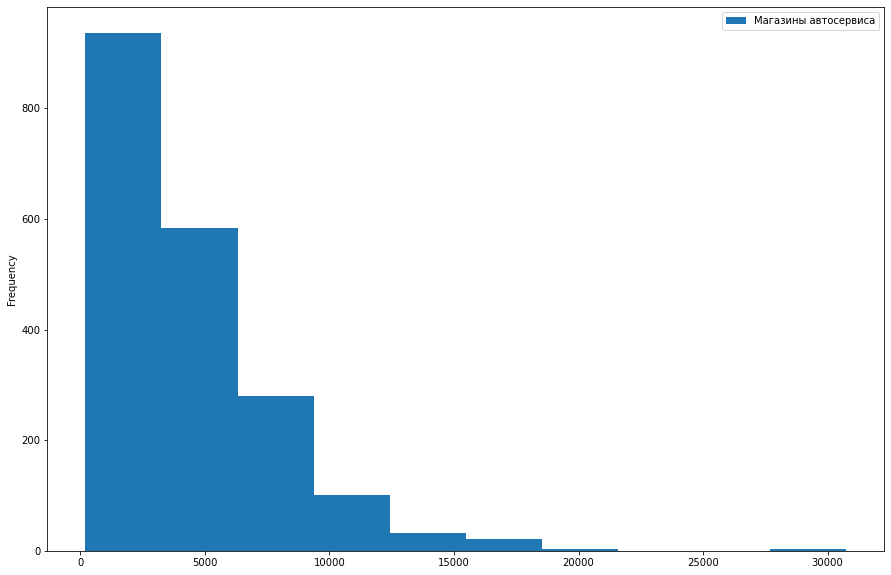

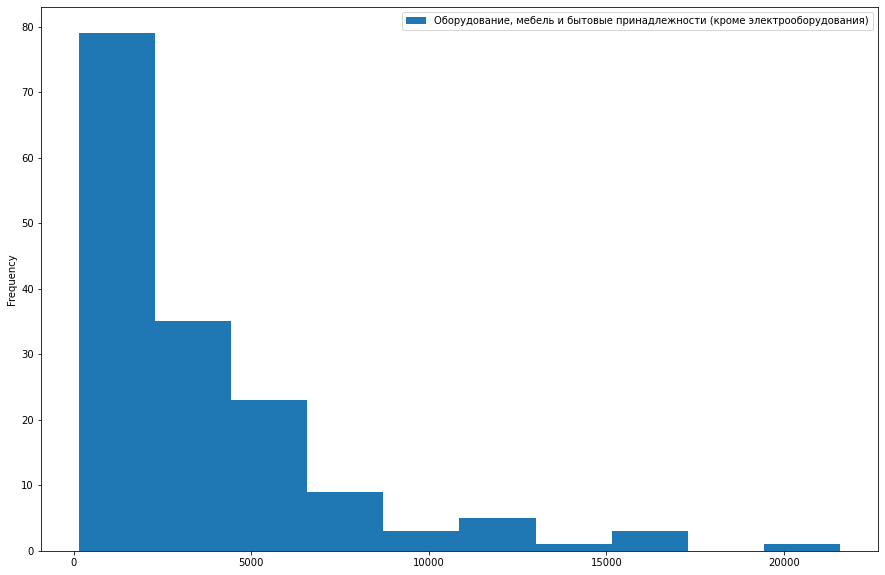

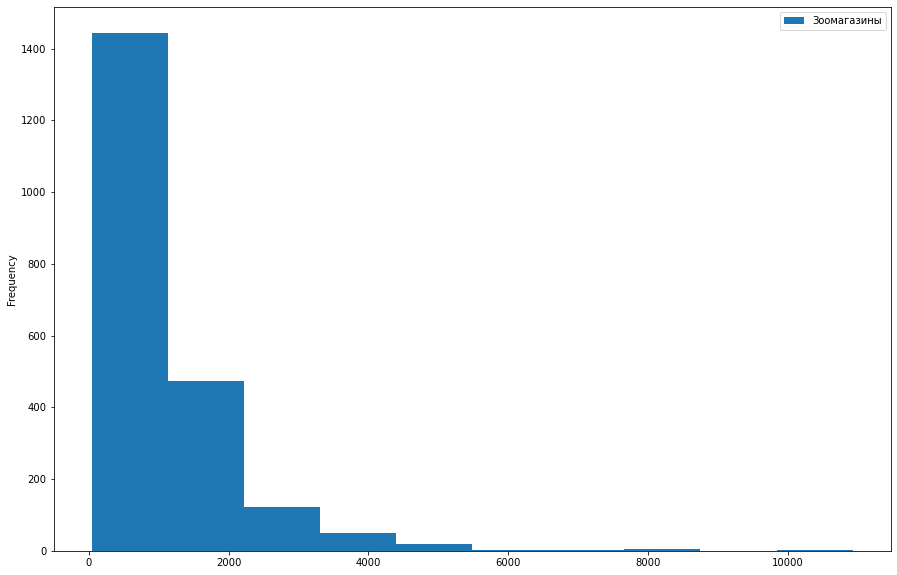

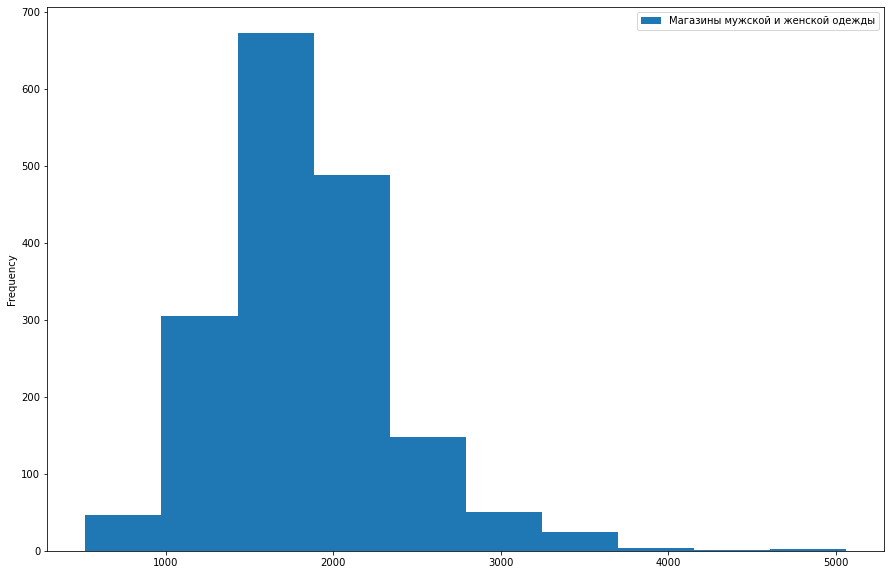

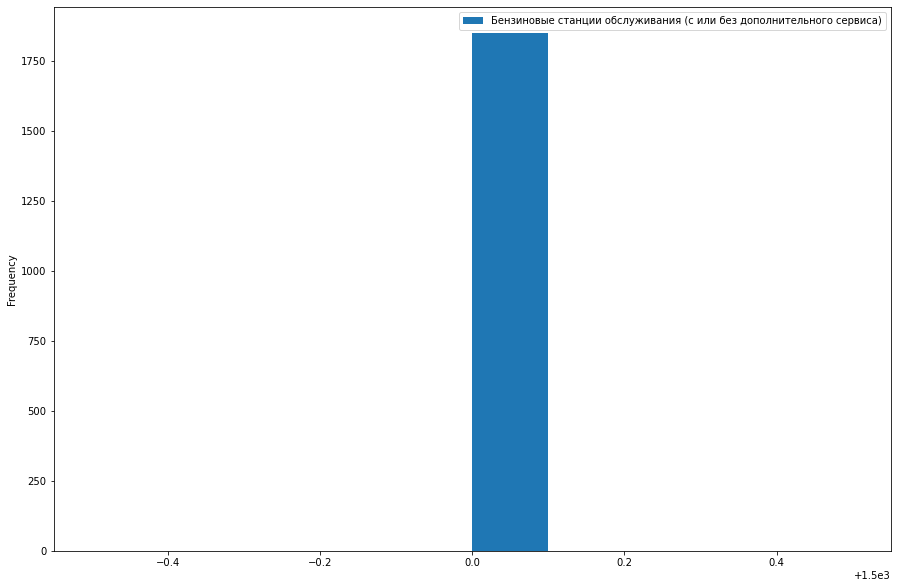

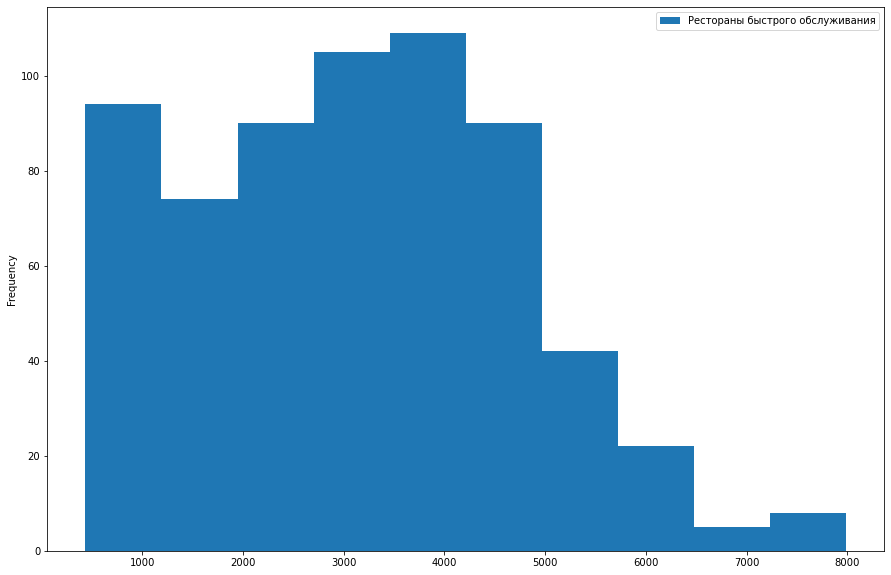

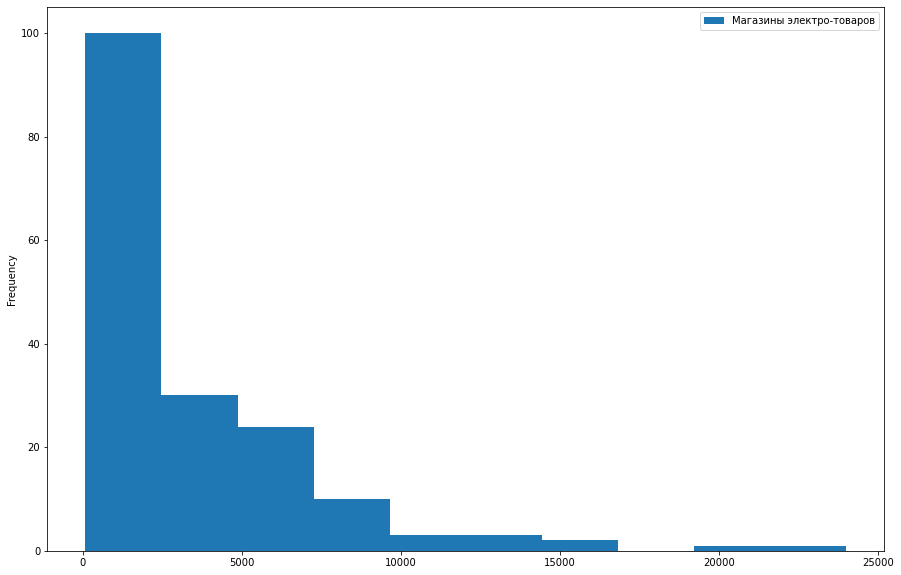

In [490]:
mean_check_by_cat = {}
for mcc in mcc_dict:
    plt.figure(figsize=(15, 10))
    data[data["MCC"] == int(mcc)].groupby(['UserId']).mean()["ProductCost"].plot.hist(label = mcc_dict[mcc])
    mean_check_by_cat[mcc_dict[mcc]] = np.round(data[data["MCC"] == int(mcc)]["ProductCost"].mean(), 2)
    plt.legend()
    plt.show()

## Все распределения не нормальны. 

In [491]:
mean_check_by_cat

{'Цифровые товары – игры': 1572.84,
 'Продуктовые магазины': 165.07,
 'Аптеки, фармацевтические магазины': 439.78,
 'Магазины автосервиса': 3938.13,
 'Оборудование, мебель и бытовые принадлежности (кроме электрооборудования)': 3888.27,
 'Зоомагазины': 977.76,
 'Магазины мужской и женской одежды': 1840.63,
 'Бензиновые станции обслуживания (с или без дополнительного сервиса)': 1500.0,
 'Рестораны быстрого обслуживания': 3305.02,
 'Магазины электро-товаров': 4082.63}

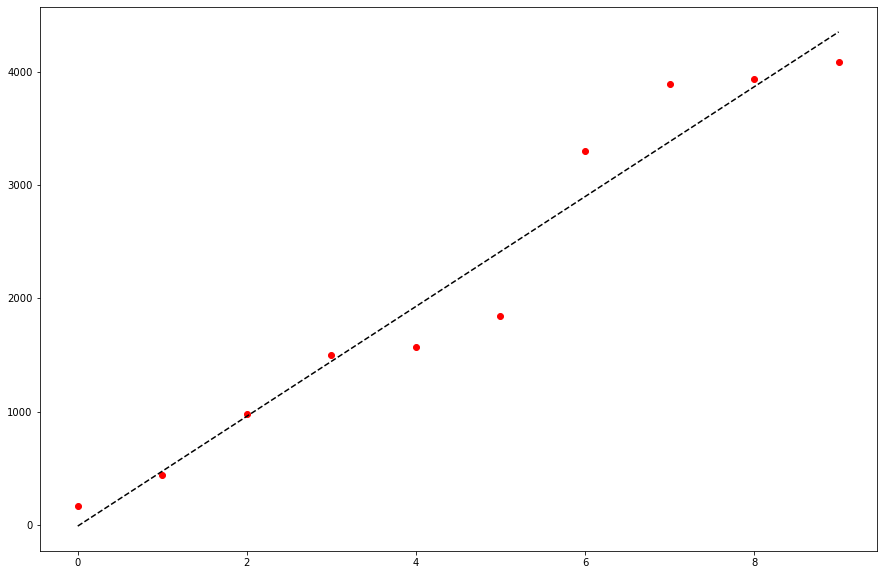

In [522]:
plt.figure(figsize=(15, 10))

coef = np.polyfit(np.linspace(0, 9, len(mean_check_by_cat)), sorted(mean_check_by_cat.values()), 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(np.linspace(0, 9, len(mean_check_by_cat)), sorted(mean_check_by_cat.values()), 'ro', np.linspace(0, 9, len(mean_check_by_cat)), poly1d_fn(np.linspace(0, 9, len(mean_check_by_cat))), '--k')

plt.show()

## По графику видно, что рост стоимости товаров приобретаемых в магизинах первых четырех категорий происходит практически линейно. Определим эти категории

In [525]:
def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k
        
for i in sorted(mean_check_by_cat.values())[:4]:
    print(get_key(mean_check_by_cat, i))

Продуктовые магазины
Аптеки, фармацевтические магазины
Зоомагазины
Бензиновые станции обслуживания (с или без дополнительного сервиса)


## Расположенные по порядку возрастания средней стоимости чека эти категории будут следующими: Продуктовые магазины, Аптеки, фармацевтические магазины, Зоомагазины, Бензиновые станции обслуживания (с или без дополнительного сервиса)

# Резюмируя, можно сказать, что:

## 1) Приобретаемые товары делятся на следющие категории магазинов: Цифровые товары – игры, Продуктовые магазины, Аптеки, Магазины автосервиса, Оборудование, мебель и бытовые принадлежности (кроме электрооборудования), Зоомагазины, Магазины мужской и женской одежды, Бензиновые станции обслуживания (с или без дополнительного сервиса), Рестораны быстрого обслуживания, Магазины электро-товаров

## 2) Чаще всего клиенты приобретают продукты. 

## 3) Средняя стоимость чека клиента по категориям:
### Цифровые товары – игры: 1572.84,
### Продуктовые магазины: 165.07,
### Аптеки, фармацевтические магазины: 439.78,
### Магазины автосервиса: 3938.13,
### Оборудование, мебель и бытовые принадлежности (кроме электрооборудования): 3888.27,
### Зоомагазины: 977.76,
### Магазины мужской и женской одежды: 1840.63,
### Бензиновые станции обслуживания (с или без дополнительного сервиса): 1500.0,
### Рестораны быстрого обслуживания: 3305.02,
### Магазины электро-товаров: 4082.63

## 4) В категории товаров приобретаемых чаще всего лидируют продукты, средства личной гигиены, бензин и корм для животных

## 5) В ценовой категории до 1000 рублей можно найти товары из всех категорий

## 6) Около линейную скорость роста стоимости среднего чека имеют товары из категорий (по возрастанию средней стоимости чека): Продуктовые магазины, Аптеки, фармацевтические магазины, Зоомагазины, Бензиновые станции обслуживания (с или без дополнительного сервиса)

## 7) Распределения цен и частот, а также категорий и частот ассиметричные и не нормальные. Также ассиметричны распределения стоимости среднего чека внутри каждой из категорий

## 8) По частоте приобретения, товары можно разделить на три крупных группы: покупают до 2000 раз, покупают от 5000 раз до 10000 раз, покупают от 10000 раз до 15000 раз

# Часть Б

In [ ]:
## Возможно, среди товаров есть похожие или повторяющиеся, но с различной записью наименований. Если определить такие товары и переименовать единым образом, можно будет построить более точную рекомендательную модель

In [619]:
from scipy.sparse import lil_matrix
from sklearn.preprocessing import normalize
from scipy.sparse import spdiags
from scipy.sparse import vstack

## Так как количество клиентов в разы превышает количество товаров, будем строить item-based рекомендательную систему 

## Для построения модели будем использовать данные о тех товарах, которые купили не менее 20 раз

## Определим число клиентов, которые купили меньше 85 товаров. 

In [540]:
(data.groupby(["UserId"]).count() < 85).value_counts()

CheckId  ProductName  ProductCost  MerchantName  MCC  
False    False        False        False         False    3000
dtype: int64

## Все клиенты купили не менее 85 товаров. С учетом того, что всего 264 товара, это немного меньше трети всех видов приобретенных товаров. Следовательно можно не исключать никаких пользователей для улучшения работы рекомендательной модели.

## Возьмем случайного клиента для проверки того, что существуют клиенты, которые несколько раз покупали один и тот же товар.
## В качестве оценки того или иного товара будет использовать число раз, которое клиент купил этот товар. 

In [602]:
products_data = data[data["MCC"] == 5441]
products_data.head()

,UserId,CheckId,ProductName,ProductCost,MerchantName,MCC
1,635,17,Творог,40.0,Пятёрочка,5441
2,551,38,Вареники,259.0,Магнит,5441
3,2852,14,Шампунь,50.0,Магнит,5441
5,1602,0,Колбаса Копчёная,140.0,Магнит,5441
6,2125,26,Каша Пшённая,75.0,Магнит,5441


In [642]:
products = products_data["ProductName"].unique()

In [603]:
len(products_data["ProductName"].unique())

67

In [604]:
products_data[products_data["UserId"] == 2217]["ProductName"].value_counts()

Пельмени              9
Конфеты               9
Леденцы               9
Лимон                 7
Мандарины             7
                     ..
Текила                1
Колбаса Докторская    1
Помидоры              1
Доширак               1
Говядина              1
Name: ProductName, Length: 64, dtype: int64

In [605]:
matrix = lil_matrix((len(products_data["ProductName"].unique()), len(products_data["UserId"].unique())))  # создаем матрицу нужных размеров

# заполняем матрицу

for user_id in products_data["UserId"].unique():
    temp_obj = products_data[products_data["UserId"] == user_id]["ProductName"].unique()
    temp_data = products_data[products_data["UserId"] == user_id]["ProductName"].value_counts()
    for obj_id in range(len(products)):
        if products[obj_id] in temp_obj:
            matrix[obj_id, user_id] = temp_data[products[obj_id]]
        else:
            matrix[obj_id, user_id] = 0

In [606]:
percent = float(matrix.nnz) / len(data["ProductName"].unique()) / len(data["UserId"].unique()) * 100
print("Процент заполненности матрицы: %.2f%%" % percent)

Процент заполненности матрицы: 22.23%


In [607]:
# косинусная мера вычисляется как отношение скалярного произведения векторов(числитель) 
# к произведению длины векторов(знаменатель)

# нормализуем исходную матрицу 
# (данное действие соответствует приведению знаменателя в формуле косинусной меры к 1)
normalized_matrix = normalize(matrix.tocsr()).tocsr()
# вычисляем скалярное произведение
cosine_sim_matrix = normalized_matrix.dot(normalized_matrix.T)

# обнуляем диагональ, чтобы исключить ее из рекомендаций
# быстрое обнуление диагонали
diag = spdiags(-cosine_sim_matrix.diagonal(), [0], *cosine_sim_matrix.shape, format='csr')
cosine_sim_matrix = cosine_sim_matrix + diag

percent = float(cosine_sim_matrix.nnz) / cosine_sim_matrix.shape[0] / cosine_sim_matrix.shape[1] * 100
print("Процент заполненности матрицы: %.2f%%" % percent)
print("Размер в МБ:", cosine_sim_matrix.data.nbytes / 1024 / 1024)

Процент заполненности матрицы: 98.51%
Размер в МБ: 0.0337371826171875


In [608]:
cosine_sim_matrix = cosine_sim_matrix.tocsr()
m = 15

# построим top-m матрицу в один поток
rows = []
for row_id in np.unique(cosine_sim_matrix.nonzero()[0]):
    row = cosine_sim_matrix[row_id]  # исходная строка матрицы
    if row.nnz > m:
        work_row = row.tolil()
        # заменяем все top-m элементов на 0, результат отнимаем от row
        # при большом количестве столбцов данная операция работает быстрее, 
        # чем простое зануление всех элементов кроме top-m
        work_row[0, row.nonzero()[1][np.argsort(row.data)[-m:]]] = 0
        row = row - work_row.tocsr()
    rows.append(row)
topk_matrix = vstack(rows) 
# нормализуем матрицу-результат
topk_matrix = normalize(topk_matrix)

percent = float(topk_matrix.nnz) / topk_matrix.shape[0] / topk_matrix.shape[1] * 100
print("Процент заполненности матрицы: %.2f%%" % percent)
print("Размер в МБ:", topk_matrix.data.nbytes / 1024 / 1024)

Процент заполненности матрицы: 22.39%
Размер в МБ: 0.00766754150390625


In [641]:
prods_test = [11, 14, 43, 54, 55, 66]
for pr in prods_test:
    print(products[pr])

Имбирь
Семечки
Виски
Пепси Кола
Стул
Чеснок


In [639]:
#подготавливаем вектор рейтингов пользователя:
user_vector = lil_matrix((len(products), 1))
user_vector[11, 0] = 1  # Имбирь
user_vector[14, 0] = 1  # Семечки
user_vector[43, 0] = 1  # Виски
user_vector[54, 0] = 7  # Пепси Кола
user_vector[55, 0] = 1  # Стул
user_vector[66, 0] = 1  # Чеснок

user_vector = user_vector.tocsr()

In [640]:
# 1. перемножить матрицу item-item и вектор рейтингов пользователя A
x = topk_matrix.dot(user_vector).tolil()
# 2. занулить ячейки, соответствующие фильмам, которые пользователь A уже оценил
for i, j in zip(*user_vector.nonzero()):
    x[i, j] = 0
    
# превращаем столбец результата в вектор
x = x.T.tocsr()    
    
# 3. отсортировать фильмы в порядке убывания значений и получить top-k рекомендаций (quorum = 10)
quorum = 10
data_ids = np.argsort(x.data)[-quorum:][::-1]

# фильмы, которые мы рекомендуем, и их связь с фильмами, которые оценил пользователь
result = []
for arg_id in data_ids:
    row_id, p = x.indices[arg_id], x.data[arg_id]
    obj_id = row_id
    
    # определяем, как повлиял на рекомендуемый фильм каждый из оцененных пользователем фильмов.
    # topk_matrix[row_id] - вектор соседей рекомендованного фильма obj_id
    # .multiply(user_vector.T) - зануляет все фильмы, которые пользователь не оценивал
    # impact_vector - вес просмотренных пользователем фильмов при подсчете метрики рекомендации obj_id
    impact_vector = topk_matrix[row_id].multiply(user_vector.T)
    
    # наиболее значимый фильм - ячейка с наибольшим значением в impact_vector
    impacted_arg_id = np.argsort(impact_vector.data)[-1]
    impacted_row_id = impact_vector.indices[impacted_arg_id]
    impact_value = user_vector[impacted_row_id, 0]
    impacted_obj_id = impacted_row_id  # наиболее значимый фильм
    
    rec_item = {
        "title": products[obj_id],
        "weight": p,
        "impact": products[impacted_obj_id],
        "impact_value": impact_value
    }
    result.append(rec_item)
    print('''Мы рекомендуем Вам "%(title)20s", так как Вы купили "%(impact)15s". Вы купили "%(impact)15s" %(impact_value)s. раз''' % rec_item)

Мы рекомендуем Вам "                Мыло", так как Вы купили "           Стул". Вы купили "           Стул" 1.0. раз
Мы рекомендуем Вам "             Верёвка", так как Вы купили "           Стул". Вы купили "           Стул" 1.0. раз
Мы рекомендуем Вам "         Хлеб Ржаной", так как Вы купили "        Семечки". Вы купили "        Семечки" 1.0. раз
Мы рекомендуем Вам "              Яблоко", так как Вы купили "        Семечки". Вы купили "        Семечки" 1.0. раз
Мы рекомендуем Вам "              Купаты", так как Вы купили "         Имбирь". Вы купили "         Имбирь" 1.0. раз
Мы рекомендуем Вам "               Ченок", так как Вы купили "         Имбирь". Вы купили "         Имбирь" 1.0. раз
Мы рекомендуем Вам " Глазированный Сырок", так как Вы купили "         Имбирь". Вы купили "         Имбирь" 1.0. раз
Мы рекомендуем Вам "              Липтон", так как Вы купили "         Имбирь". Вы купили "         Имбирь" 1.0. раз
Мы рекомендуем Вам "              Бритва", так как Вы купили "  

## Аналогично будут строиться модели для каждой категории магазина.
## Попробуем повысить качество рекомендаций, изменив способ оценки продукта

In [652]:
max_buy_pr = np.zeros(len(products_data["ProductName"].unique()))
for pr in range(len(products)):
    for usr_id in products_data["UserId"].unique():
        temp = products_data[products_data["UserId"] == usr_id]["ProductName"].value_counts()
        if products[pr] in temp:
            max_buy_pr[pr] = max(max_buy_pr[pr], temp[products[pr]])
max_buy_pr

array([14., 16., 11., 11., 10., 10., 16., 14., 11., 16., 19., 15., 20.,
        8., 18., 11., 10., 16., 10., 11., 17., 16., 22., 16., 14., 15.,
       12., 12.,  9.,  9., 16., 10., 10., 10., 14., 20.,  9.,  9., 11.,
       17.,  9.,  5., 10., 10., 10.,  8., 11., 15., 15., 10., 10.,  9.,
       11.,  9., 12.,  5., 10., 14., 11., 12.,  9., 10.,  5.,  9., 10.,
        5.,  5.])

## Повторно построим модель и сравним результаты

In [719]:
matrix = lil_matrix((len(products_data["ProductName"].unique()), len(products_data["UserId"].unique())))  # создаем матрицу нужных размеров

# заполняем матрицу

for user_id in products_data["UserId"].unique():
    temp_obj = products_data[products_data["UserId"] == user_id]["ProductName"].unique()
    temp_data = products_data[products_data["UserId"] == user_id]["ProductName"].value_counts()
    for obj_id in range(len(products)):
        if products[obj_id] in temp_obj:
            matrix[obj_id, user_id] = round(temp_data[products[obj_id]] / max_buy_pr[obj_id] * 5)
            #print(matrix[obj_id, user_id], round(temp_data[products[obj_id]] / max_buy_pr[obj_id] * 5))
        else:
            matrix[obj_id, user_id] = 0

In [698]:
percent = float(matrix.nnz) / len(data["ProductName"].unique()) / len(data["UserId"].unique()) * 100
print("Процент заполненности матрицы: %.2f%%" % percent)

Процент заполненности матрицы: 19.34%


In [699]:
# косинусная мера вычисляется как отношение скалярного произведения векторов(числитель) 
# к произведению длины векторов(знаменатель)

# нормализуем исходную матрицу 
# (данное действие соответствует приведению знаменателя в формуле косинусной меры к 1)
normalized_matrix = normalize(matrix.tocsr()).tocsr()
# вычисляем скалярное произведение
cosine_sim_matrix = normalized_matrix.dot(normalized_matrix.T)

# обнуляем диагональ, чтобы исключить ее из рекомендаций
# быстрое обнуление диагонали
diag = spdiags(-cosine_sim_matrix.diagonal(), [0], *cosine_sim_matrix.shape, format='csr')
cosine_sim_matrix = cosine_sim_matrix + diag

percent = float(cosine_sim_matrix.nnz) / cosine_sim_matrix.shape[0] / cosine_sim_matrix.shape[1] * 100
print("Процент заполненности матрицы: %.2f%%" % percent)
print("Размер в МБ:", cosine_sim_matrix.data.nbytes / 1024 / 1024)

Процент заполненности матрицы: 98.51%
Размер в МБ: 0.0337371826171875


In [700]:
cosine_sim_matrix = cosine_sim_matrix.tocsr()
m = 15

# построим top-m матрицу в один поток
rows = []
for row_id in np.unique(cosine_sim_matrix.nonzero()[0]):
    row = cosine_sim_matrix[row_id]  # исходная строка матрицы
    if row.nnz > m:
        work_row = row.tolil()
        # заменяем все top-m элементов на 0, результат отнимаем от row
        # при большом количестве столбцов данная операция работает быстрее, 
        # чем простое зануление всех элементов кроме top-m
        work_row[0, row.nonzero()[1][np.argsort(row.data)[-m:]]] = 0
        row = row - work_row.tocsr()
    rows.append(row)
topk_matrix = vstack(rows) 
# нормализуем матрицу-результат
topk_matrix = normalize(topk_matrix)

percent = float(topk_matrix.nnz) / topk_matrix.shape[0] / topk_matrix.shape[1] * 100
print("Процент заполненности матрицы: %.2f%%" % percent)
print("Размер в МБ:", topk_matrix.data.nbytes / 1024 / 1024)

Процент заполненности матрицы: 22.39%
Размер в МБ: 0.00766754150390625


In [701]:
prods_test = [11, 14, 43, 54, 55, 66]
for pr in prods_test:
    print(products[pr])

Имбирь
Семечки
Виски
Пепси Кола
Стул
Чеснок


In [716]:
#подготавливаем вектор рейтингов пользователя:
user_vector = lil_matrix((len(products), 1))
user_vector[11, 0] = 1  # Имбирь
user_vector[14, 0] = 1  # Семечки
user_vector[43, 0] = 1  # Виски
user_vector[54, 0] = 5  # Пепси Кола
user_vector[55, 0] = 1  # Стул
user_vector[66, 0] = 1  # Чеснок

user_vector = user_vector.tocsr()

In [720]:
# 1. перемножить матрицу item-item и вектор рейтингов пользователя A
x = topk_matrix.dot(user_vector).tolil()
# 2. занулить ячейки, соответствующие фильмам, которые пользователь A уже оценил
for i, j in zip(*user_vector.nonzero()):
    x[i, j] = 0
    
# превращаем столбец результата в вектор
x = x.T.tocsr()    
    
# 3. отсортировать фильмы в порядке убывания значений и получить top-k рекомендаций (quorum = 10)
quorum = 10
data_ids = np.argsort(x.data)[-quorum:][::-1]

# фильмы, которые мы рекомендуем, и их связь с фильмами, которые оценил пользователь
result = []
for arg_id in data_ids:
    row_id, p = x.indices[arg_id], x.data[arg_id]
    obj_id = row_id
    
    # определяем, как повлиял на рекомендуемый фильм каждый из оцененных пользователем фильмов.
    # topk_matrix[row_id] - вектор соседей рекомендованного фильма obj_id
    # .multiply(user_vector.T) - зануляет все фильмы, которые пользователь не оценивал
    # impact_vector - вес просмотренных пользователем фильмов при подсчете метрики рекомендации obj_id
    impact_vector = topk_matrix[row_id].multiply(user_vector.T)
    
    # наиболее значимый фильм - ячейка с наибольшим значением в impact_vector
    impacted_arg_id = np.argsort(impact_vector.data)[-1]
    impacted_row_id = impact_vector.indices[impacted_arg_id]
    impact_value = user_vector[impacted_row_id, 0]
    impacted_obj_id = impacted_row_id  # наиболее значимый фильм
    
    rec_item = {
        "title": products[obj_id],
        "weight": p,
        "impact": products[impacted_obj_id],
        "impact_value": impact_value
    }
    result.append(rec_item)
    print('''Мы рекомендуем Вам "%(title)20s", так как Вы купили "%(impact)15s".''' % rec_item)

Мы рекомендуем Вам "                Мыло", так как Вы купили "           Стул".
Мы рекомендуем Вам "             Верёвка", так как Вы купили "           Стул".
Мы рекомендуем Вам "             Шоколад", так как Вы купили "         Имбирь".
Мы рекомендуем Вам "         Хлеб Ржаной", так как Вы купили "        Семечки".
Мы рекомендуем Вам "              Бритва", так как Вы купили "        Семечки".
Мы рекомендуем Вам "              Купаты", так как Вы купили "        Семечки".
Мы рекомендуем Вам " Глазированный Сырок", так как Вы купили "        Семечки".
Мы рекомендуем Вам "       Картофель Фри", так как Вы купили "        Семечки".
Мы рекомендуем Вам "           Мороженое", так как Вы купили "        Семечки".
Мы рекомендуем Вам "               Ченок", так как Вы купили "         Имбирь".


## Рекомендации изменились, но оценить их релевантность все еще сложно
## Для более точной настройки модели, необходимо тестирование в реальных условиях, чтобы оценить, насколько часто клиенты приобретают товары из рекомендаций